<a href="https://colab.research.google.com/github/1985shree/Data-science-Zoomcamp-projects/blob/main/MML_zoomcamp_week3_classification_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#uploading ipynb from local folder to google drive/colab folder
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import io

df = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [17]:
data = df [['neighbourhood_group', 'room_type','latitude','longitude','price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

In [18]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Manhattan
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Entire home/apt
latitude,40.6475,40.7536,40.809,40.6851,40.7985,40.7477,40.6869,40.7649,40.8018,40.7134
longitude,-73.9724,-73.9838,-73.9419,-73.9598,-73.944,-73.975,-73.956,-73.9849,-73.9672,-73.9904
price,149,225,150,89,80,200,60,79,79,150
minimum_nights,1,1,3,1,10,3,45,2,2,1
number_of_reviews,9,45,0,270,9,74,49,430,118,160
reviews_per_month,0.21,0.38,NaN,4.64,0.1,0.59,0.4,3.47,0.99,1.33
calculated_host_listings_count,6,2,1,1,1,1,1,1,1,4
availability_365,365,355,365,194,0,129,0,220,0,188


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
reviews_per_month,38843.0,1.373221,1.680442,0.01000,0.19000,0.72000,2.020000,58.50000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


In [23]:
pd.value_counts(data.neighbourhood_group)

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

Q1 Answer: Manhattan

**setting up validation framework** 

In [27]:
!pip install scikit-learn


In [30]:
from sklearn.model_selection import train_test_split

In [43]:
data.copy()

df_full_train, df_test = train_test_split(data, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)
print( len (df_train), len(df_val), len(df_test))

df_train.reset_index(drop = True)
df_val.reset_index(drop = True)
df_test.reset_index(drop = True)

y_train = df_train['price']
y_val = df_val['price']
y_test = df_test['price']

29337 9779 9779


In [44]:
del(df_train['price'])
del(df_val['price'])
del(df_test['price'])

**EDA**

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,0.002646,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.140201,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.111121,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.549792,-0.073167,0.174477
reviews_per_month,0.002646,0.140201,-0.111121,0.549792,1.000000,-0.007055,0.188765
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.007055,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.188765,0.225913,1.000000


[Text(0.5, 0, 'latitude'),
 Text(1.5, 0, 'longitude'),
 Text(2.5, 0, 'minimum_nights'),
 Text(3.5, 0, 'number_of_reviews'),
 Text(4.5, 0, 'reviews_per_month'),
 Text(5.5, 0, 'calculated_host_listings_count'),
 Text(6.5, 0, 'availability_365')]

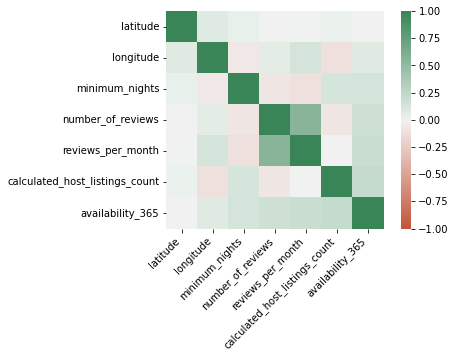

In [67]:
above_average_train = (y_train >= 152).astype(int)
above_average_val =(y_val >= 152).astype(int) 
above_average_test = (y_test >= 152).astype(int)

In [70]:
df_train.dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

**feature importance/feature engineering: churn rate and risk ratio**

Answer to Q3 : room type

**feature importance: mutual information**

In [81]:
categorical = ['neighbourhood_group', 'room_type']
df_train_categorical = df_train[categorical]

In [82]:
from sklearn.metrics import mutual_info_score
neighbourhood_score = mutual_info_score(df_train_categorical.neighbourhood_group, y_train )
room_type_score = mutual_info_score(df_train_categorical.room_type, y_train )
print (round(neighbourhood_score, 2), round(room_type_score, 2))


0.11 0.31


**feature importance: correlation**

In [83]:
#correlation matrix
train_corr = df_train.corr()
train_corr

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,0.002646,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.140201,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.111121,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.549792,-0.073167,0.174477
reviews_per_month,0.002646,0.140201,-0.111121,0.549792,1.000000,-0.007055,0.188765
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.007055,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.188765,0.225913,1.000000


[Text(0.5, 0, 'latitude'),
 Text(1.5, 0, 'longitude'),
 Text(2.5, 0, 'minimum_nights'),
 Text(3.5, 0, 'number_of_reviews'),
 Text(4.5, 0, 'reviews_per_month'),
 Text(5.5, 0, 'calculated_host_listings_count'),
 Text(6.5, 0, 'availability_365')]

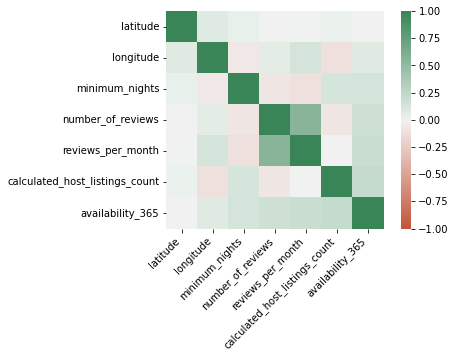

In [84]:
#visualizing correlation matrix
import seaborn as sns
ax = sns.heatmap(train_corr, vmin = -1, vmax = 1, center = 0, cmap=sns.diverging_palette(20, 500, n=200), square=True)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right')

reviews per month, number of reviews

**one-hot encoding**

In [111]:
from sklearn.feature_extraction import DictVectorizer
train_dicts = df_train.to_dict(orient = 'records')
train_dicts[0]


{'availability_365': 50,
 'calculated_host_listings_count': 13,
 'latitude': 40.7276,
 'longitude': -73.94495,
 'minimum_nights': 3,
 'neighbourhood_group': 'Brooklyn',
 'number_of_reviews': 29,
 'reviews_per_month': 0.7,
 'room_type': 'Entire home/apt'}

In [112]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [113]:
val_dicts = train_dicts = df_val.to_dict(orient = 'records')

In [114]:
X_val = dv.transform(val_dicts)

In [110]:
print(X_train[0])

  (0, 0)	50.0
  (0, 1)	13.0
  (0, 2)	40.7276
  (0, 3)	-73.94495
  (0, 4)	3.0
  (0, 6)	1.0
  (0, 10)	29.0
  (0, 11)	0.7
  (0, 12)	1.0


**logistic regression**

**training logistic regression with scikit-learn**

**model interpretation**

**using the model**